## Observations and Insights 

1) The distribution of male to female mice in the study is very close, nearly a 50/50 split. 

2) The drug regimen Ketapril has the largest variation in tumor sizes, while Ramicane had the smallest variation.

3) In Capomulin regimen study, scatter plot shows that avg volume of tumor increases with the weight of the mouse.  

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
single_df = pd.merge(mouse_metadata,study_results,how='inner',on='Mouse ID')
# Display the data table for preview
single_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
single_df['Mouse ID'].nunique()

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_data = single_df.loc[single_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id=pd.DataFrame(duplicate_data)
duplicate_mouse_id

,0
0,g989


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = single_df[single_df['Mouse ID'].isin(duplicate_data)==False]

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean

regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median

regimen_var = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_var

regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem


# Assemble the resulting series into a single summary dataframe.
regimen_summary_df_1 = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_var, "Standard Deviation": regimen_std, "SEM": regimen_sem})

regimen_summary_df_1.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
aggregation = {'Tumor Volume (mm3)' : ['mean','median','var','std','sem']}

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_df_2 = clean_df.groupby('Drug Regimen').agg(aggregation).reset_index()
regimen_summary_df_2 = regimen_summary_df_2.set_index('Drug Regimen')
regimen_summary_df_2.columns = ['Mean','Median','Variance','Standard Deviation', 'SEM']
regimen_summary_df_2.head(30)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

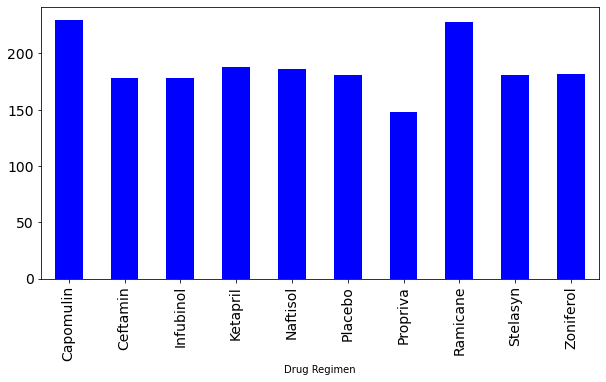

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_per_regimen = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 
plot_pandas = mouse_per_regimen.plot.bar(figsize=(10,5), color='b',fontsize = 14)

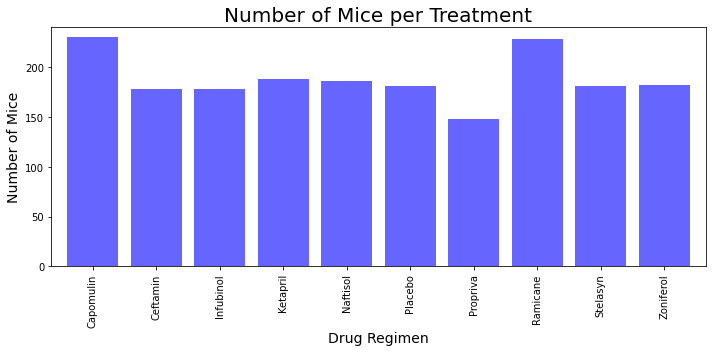

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice_list =(clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

regimen_list = sorted(clean_df["Drug Regimen"].unique())

x_axis = np.arange(len(mouse_per_regimen))
y_axis = regimen_list
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.bar(x_axis, mice_list, color='b', alpha=.6, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,regimen_list ,  rotation='vertical')
plt.xlim(-0.65, len(x_axis)-0.35)
plt.ylim(0, max(mice_list)+10)

plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.tight_layout()
plt.show()


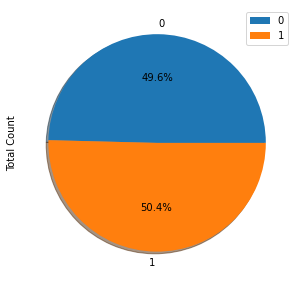

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupby_gender = clean_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(groupby_gender.size())
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count().reset_index())
mouse_gender.columns = ['Sex','Total Count']
#mouse_gender.head()
plot_pandas = mouse_gender.plot.pie(y='Total Count', figsize=(5,5),shadow=True ,startangle=0, autopct='%1.1f%%')

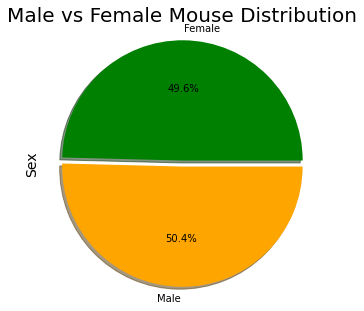

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_gender['Sex']
#List the values of each section of the pie chart
sizes = mouse_gender['Total Count']

#Set colors for each section of the pie
colors = ['green', 'orange']
explode = (0.05, 0)

fig1, ax1 = plt.subplots(figsize=(5, 5))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, shadow=True,autopct="%1.1f%%")
plt.title('Male vs Female Mouse Distribution',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
clean_df_sorted = clean_df.sort_values(['Mouse ID','Timepoint'])
selected = ['Capomulin','Ramicane','Infubinol','Ceftamin']

regimen = clean_df_sorted['Drug Regimen'].apply(lambda x: any(item for item in selected if item in x))
selected_regimen_df = clean_df_sorted[regimen]

# Start by getting the last (greatest) timepoint for each mouse
selected_regimen_group = selected_regimen_df.groupby(['Drug Regimen', 'Mouse ID']).apply(lambda t: t[t.Timepoint==t.Timepoint.max()])
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
selected_regimen_summary = selected_regimen_group[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Weight (g)', 'Tumor Volume (mm3)']]
selected_regimen_summary

Mouse ID Drug Regimen  Timepoint  Weight (g)  \
Drug Regimen Mouse ID                                                    
Capomulin    b128     309     b128    Capomulin         45          22   
             b742     299     b742    Capomulin         45          21   
             f966     64      f966    Capomulin         20          17   
             g288     244     g288    Capomulin         45          19   
             g316     360     g316    Capomulin         45          22   
...                            ...          ...        ...         ...   
Ramicane     s508     59      s508     Ramicane         45          17   
             u196     410     u196     Ramicane         45          25   
             w678     449     w678     Ramicane          5          24   
             y449     453     y449     Ramicane         15          24   
             z578     84      z578     Ramicane         45          16   

                           Tumor Volume (mm3)  
Drug Regimen Mouse ID                          
Capomulin    b128     309           38.982878  
             b742     299           38.939633  
             f966     64            30.485985  
             g288     244           37.074024  
             g316     360           40.159220  
...                                       ...  
Ramicane     s508     59            30.276232  
             u196     410           40.667713  
             w678     449           43.166373  
             y449     453           44.183451  
             z578     84            30.638696  

[100 rows x 5 columns]

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    capo_df = selected_regimen_summary[selected_regimen_summary.iloc[:,1] == treatment]
    capovol = capo_df['Tumor Volume (mm3)']
    # add subset 
    quartiles_c = capovol.quantile([.25,.5,.75])
    lowerq_c = quartiles_c[0.25]
    upperq_c = quartiles_c[0.75]
    iqr_c = upperq_c-lowerq_c
    max_c = capo_df['Tumor Volume (mm3)'].max()
    min_c = capo_df['Tumor Volume (mm3)'].min()
    
    # Determine outliers using upper and lower bounds
    lower_bound_c = lowerq_c - (1.5*iqr_c)
    upper_bound_c = upperq_c + (1.5*iqr_c)
    
    if (max_c > upper_bound_c) | (min_c < lower_bound_c):
        print(f'Max/Min Tumor Volume in {treatment} is {max_c:.2f}/{min_c:.2f}, outliers are present')
    else:
        print(f'Max/Min Tumor Volume in {treatment} is {max_c:.2f}/{min_c:.2f}, so no outliers are present')
    print('----------------------------')    

Max/Min Tumor Volume in Capomulin is 47.69/23.34, so no outliers are present
----------------------------
Max/Min Tumor Volume in Ceftamin is 68.92/45.00, so no outliers are present
----------------------------
Max/Min Tumor Volume in Infubinol is 72.23/36.32, outliers are present
----------------------------
Max/Min Tumor Volume in Ramicane is 45.22/22.05, so no outliers are present
----------------------------


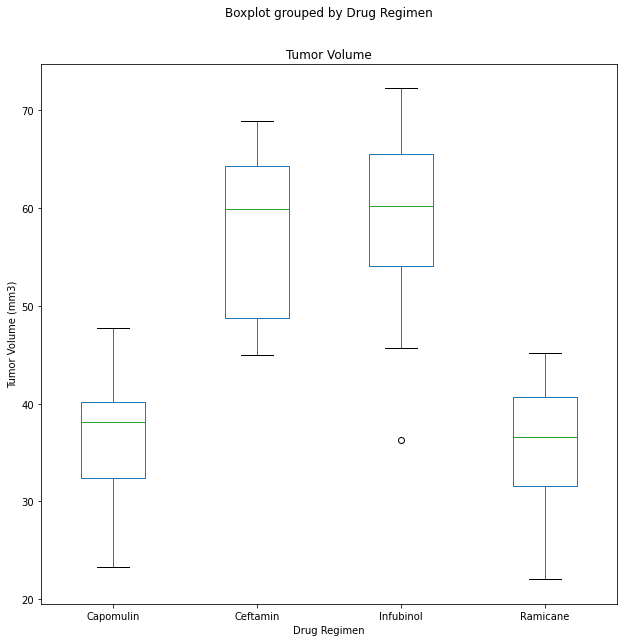

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mouse_id = selected_regimen_summary['Mouse ID']
regimen = selected_regimen_summary['Drug Regimen']
time = selected_regimen_summary['Timepoint']
volume = selected_regimen_summary['Tumor Volume (mm3)']
weight = selected_regimen_summary['Weight (g)']

# make new df 
boxplot_df = pd.DataFrame({'Mouse ID': mouse_id, 'Drug Regimen': regimen, 'Timepoint': time, 'Weight (g)': weight, 'Tumor Volume': volume})
boxplot_df = boxplot_df.reset_index(drop=True)
boxplot_df.boxplot(figsize=(10,10), by='Drug Regimen', column=['Tumor Volume'], grid=False)
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

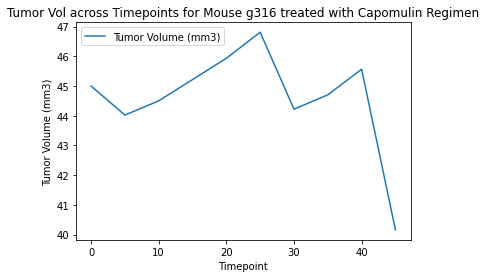

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
selected_mouse_id = "g316"
selected_mouse_id_df = clean_df[clean_df.iloc[:,1] == 'Capomulin']
selected_mouse_id_df = selected_mouse_id_df[selected_mouse_id_df.iloc[:,0] == 'g316']

# plot line Volume across treatments
line = selected_mouse_id_df.plot(x='Timepoint', y='Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Vol across Timepoints for Mouse g316 treated with Capomulin Regimen')
plt.show()

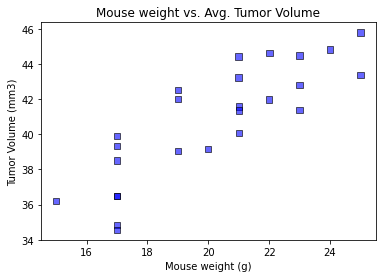

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
clean_df.head()
cap_regimen = clean_df[clean_df.iloc[:,1] == 'Capomulin'].groupby(['Mouse ID']).agg(Mouse_weight=('Weight (g)', np.mean),\
                                                                    Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)).round(3)
plt.scatter(
    cap_regimen['Mouse_weight'],
    cap_regimen['Tumor_vol_mean'],
    marker='s',
    facecolors='blue',
    edgecolors='black',
    s=cap_regimen['Tumor_vol_mean'],
    alpha=.60)

# Create a title, x label, and y label for chart
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_regimen['Mouse_weight'],cap_regimen['Tumor_vol_mean'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.841946102026108
The equation of the regression line is: y = 0.95x + 21.55


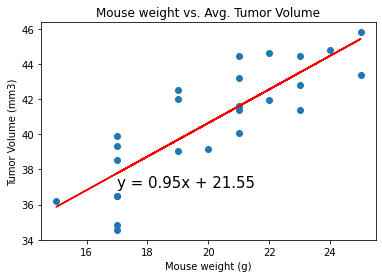

In [44]:
x_values = cap_regimen['Mouse_weight']
y_values = cap_regimen['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.show()